# A simple classification of fruits using KNN

In [58]:
#Libraries that are going to be used further
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_table('fruit_data_with_colors.txt')

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [6]:
df.shape

(59, 7)

In [10]:
# Mapping from fruit label value to fruit name
predict = dict(zip(df.fruit_label.unique(), df.fruit_name.unique()))   
predict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [11]:
#Number of unique fruits
df['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [15]:
#Store each fruits on a different dataframes
df_apple = df[df['fruit_name']=='apple']
df_orange = df[df['fruit_name']=='orange']
df_lemon = df[df['fruit_name']=='lemon']
df_mandarin = df[df['fruit_name']=='mandarin']

In [17]:
df_orange.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [18]:
df_apple.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [41]:
colors = np.random.rand(59)

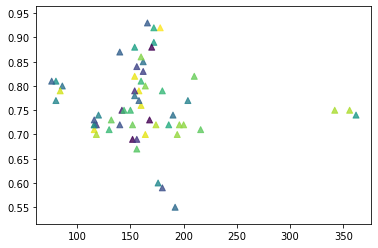

In [44]:
# Every fruit has a different fruit label.
plt.scatter(df['mass'], df['color_score'],marker='^', c=colors, alpha=0.8)

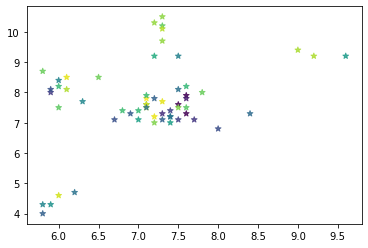

In [47]:
plt.scatter(df['width'],df['height'],marker='*', c=colors, alpha=0.8)

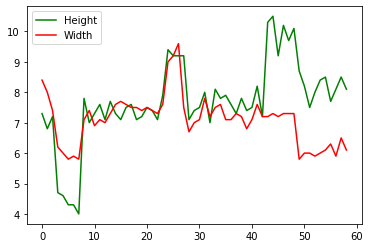

In [56]:
plt.plot(df['height'],'g', label='Height')
plt.plot(df['width'],'r',label='Width')
plt.legend()

## Now we will use KNN classifier to predict

In [70]:
X = df[['mass','width','height']]
Y = df['fruit_label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 0)

In [69]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [71]:
X_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


## KNN classifier for making predictions

In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
#check accuracy
knn.score(X_test,Y_test)

0.5333333333333333

In [77]:
#Make prediction with new data
mass = input()
width = input()
height = input()
prediction = knn.predict([[mass, width, height]])
predict[prediction[0]]

100
6.3
8


C:\Users\Priyanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\Priyanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


'lemon'

In [ ]:
# We are getting accurate predictions.